In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import os

# Blend solutions of day1 and day2

In [2]:
sub0 = pd.read_csv('submission-day-1-B.csv', header=None)
sub1 = pd.read_csv('submission-day-1-2-B.csv', header=None)
sub0.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0683,0.0342,0.0228,0.0171,0.0137,0.0114,0.0333,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0659
1,0.0579,0.0290,0.0193,0.0145,0.0116,0.0097,0.0333,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0915
2,0.3300,0.1650,0.1100,0.0825,0.0660,0.0550,0.0333,0.0333,0.0333,0.0333,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.1564,0.0782,0.0521,0.0391,0.0313,0.0261,0.0333,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0169,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0595,0.0298,0.0198,0.0149,0.0119,0.0099,0.0333,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0875


In [3]:
sub1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0357,0.0715,0.0477,0.0357,0.0286,0.0238,0.0204,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0032
1,0.0294,0.0589,0.0393,0.0294,0.0236,0.0196,0.0168,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0497
2,0.1422,0.2844,0.1896,0.1422,0.1138,0.0948,0.0330,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0760,0.1520,0.1013,0.0760,0.0608,0.0507,0.0434,0.0333,0.0333,0.0333,...,0.0066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0306,0.0613,0.0409,0.0306,0.0245,0.0204,0.0175,0.0333,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0333,0.0407


In [6]:
sub = sub0.copy()

sub[0] = sub0[0].values**0.25 * sub1[0].values**0.75
sub[1] = sub0[1].values**0.75 * sub1[1].values**0.25

for i in range(2,30):
    sub[i] = sub0[(i)].values**0.5 * sub1[(i)].values**0.50
    
for i in range(28,-1,-1):
    sub[i] = sub[i].values*0.60 + sub[i+1].values*0.40
for i in range(1,30):
    sub[i] = sub[i].values*0.95 + sub[i-1].values*0.05
    
for i in range(1,30):
    sub[i] = (sub[i-1] + sub[i] ).clip(0,1)
for i in range(29,0,-1):
    sub[i] = sub[i] - sub[i-1]
    sub[i] = sub[i].clip(0,1)

sub.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.039700,0.036442,0.029363,0.023328,0.020606,0.021423,0.028582,0.033064,0.033288,0.033299,...,0.033295,0.033288,0.033270,0.033225,3.311360e-02,3.283399e-02,3.213498e-02,3.038745e-02,2.601862e-02,1.509655e-02
1,0.033094,0.030623,0.024618,0.019702,0.017742,0.019201,0.027096,0.032990,0.033284,0.033299,...,0.033309,0.033322,0.033354,0.033436,3.363885e-02,3.414712e-02,3.541780e-02,3.859449e-02,4.653622e-02,6.639056e-02
2,0.170560,0.163505,0.126209,0.095603,0.073666,0.052400,0.021515,0.001076,0.000054,0.000003,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.086886,0.080984,0.064072,0.049736,0.041138,0.036521,0.036149,0.033442,0.033307,0.033299,...,0.009642,0.000482,0.000024,0.000001,6.026300e-08,3.013150e-09,1.506575e-10,7.532863e-12,3.766987e-13,1.887379e-14
4,0.034261,0.031592,0.025421,0.020322,0.018215,0.019577,0.027393,0.033005,0.033285,0.033299,...,0.033307,0.033317,0.033342,0.033405,3.356182e-02,3.395456e-02,3.493640e-02,3.739100e-02,4.352751e-02,5.886877e-02


In [ ]:
sub.to_csv('submission-xgboost-day-1-2-boost-blend.csv', index=False, header=None, float_format='%.4f')
# 3.94272468849741

# Now ensemble previous blend with 'submission-day-1-A.csv'

In [2]:
sub0 = pd.read_csv('submission-xgboost-day-1-2-boost-blend.csv', header=None)
sub1 = pd.read_csv('submission-day-1-A.csv', header=None)
sub0.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0398,0.0366,0.0294,0.0234,0.0206,0.0215,0.0286,0.0331,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0332,0.0331,0.0328,0.0321,0.0304,0.0260,0.0150
1,0.0329,0.0303,0.0244,0.0196,0.0176,0.0191,0.0271,0.0330,0.0333,0.0333,...,0.0333,0.0333,0.0334,0.0334,0.0336,0.0342,0.0355,0.0387,0.0468,0.0671
2,0.1712,0.1645,0.1268,0.0961,0.0740,0.0526,0.0215,0.0011,0.0001,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0869,0.0811,0.0641,0.0497,0.0411,0.0365,0.0361,0.0334,0.0333,0.0333,...,0.0096,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0347,0.0322,0.0258,0.0206,0.0184,0.0197,0.0274,0.0330,0.0333,0.0333,...,0.0333,0.0333,0.0333,0.0334,0.0335,0.0339,0.0348,0.0372,0.0430,0.0574


# Correlation between solutions

In [3]:
np.corrcoef( sub0.loc[:,range(30)].values.flatten(), sub1.loc[:,range(30)].values.flatten() )[0,1]

0.7842676252959085

# Correlation at each day

In [5]:
for i in range(30):
    print( i, np.corrcoef( sub0.loc[:,i].values.flatten(), sub1.loc[:,i].values.flatten() )[0,1] )

0 0.9322170816500419
1 0.9243341863401012
2 0.896603955487713
3 0.8757379161181341
4 0.8537371617949062
5 0.825053094333718
6 0.7096650526391437
7 0.17317470582065228
8 0.17266650106455708
9 0.803457821454645
10 0.8147512067513836
11 0.8163856666568571
12 0.8181324546231209
13 0.8203953745667873
14 0.8240261370278144
15 0.8278595867795663
16 0.832487769268414
17 0.8376871878987486
18 0.8433483616042603
19 0.8517797912893623
20 0.860618798072049
21 0.8687613180781786
22 0.8759170940387055
23 0.8810374418280665
24 0.8849975628826234
25 0.8877771522295532
26 0.8855270772536327
27 0.872537121104655
28 0.8499779621273728
29 0.8215458573709722


# Ensemble final models

In [6]:
for i in range(30):
    sub0[i] = 0.55*sub0[i] + 0.45*sub1[i]
    
sub0.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.051455,0.036195,0.029040,0.023805,0.020870,0.020330,0.023335,0.025090,0.024525,0.032895,...,0.03330,0.033345,0.033345,0.033335,0.03337,0.033385,0.033405,0.033415,0.03302,0.031515
1,0.051395,0.034800,0.027910,0.023110,0.020480,0.020090,0.023500,0.025890,0.025335,0.032895,...,0.03330,0.033300,0.033355,0.033355,0.03351,0.033840,0.034600,0.036405,0.04104,0.052565
2,0.252695,0.176695,0.138680,0.111535,0.092000,0.055300,0.011825,0.000605,0.000055,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.132260,0.090550,0.072020,0.058610,0.049965,0.044375,0.041635,0.038035,0.036135,0.033435,...,0.00528,0.000275,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.048515,0.033730,0.027015,0.022220,0.019660,0.019295,0.022675,0.024990,0.024525,0.032895,...,0.03330,0.033345,0.033345,0.033445,0.03359,0.033990,0.034890,0.037155,0.04246,0.055015


# Average of daily probabilities

<AxesSubplot:>

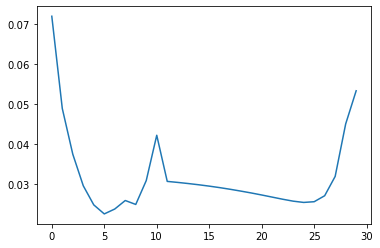

In [9]:
# Baseline submission have uniform 1/30 probability each day

sub0.mean(0).plot()

# Average of cumulative probabilities

<AxesSubplot:>

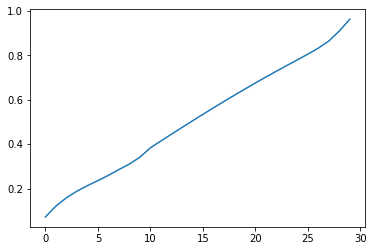

In [12]:
# Baseline submission looks like a line

sub0.cumsum(1).mean().plot()

In [7]:
sub0.to_csv('submission-final-1.csv', index=False, header=None, float_format='%.4f')
# 3.8757729